In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [56]:

data = pd.read_csv("HousingData.csv")

print(data.head())
print(data.info())

data = data.fillna(data.mean())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float6

In [57]:


X = data.drop("MEDV", axis=1)   # Features
y = data["MEDV"]                # Target



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a Model

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [58]:
# Prediction

y_pred = model.predict(X_test_scaled)

# Evaluation

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("RMSE:", rmse)
print("R² Score:", r2)




Model Performance:
RMSE: 5.00176689019419
R² Score: 0.6588520195508119


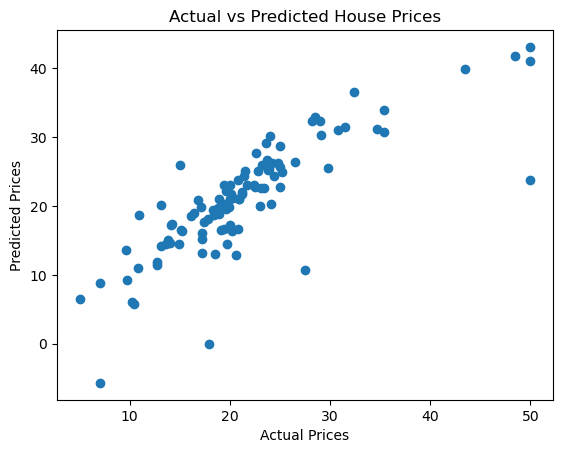

In [59]:

# Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()



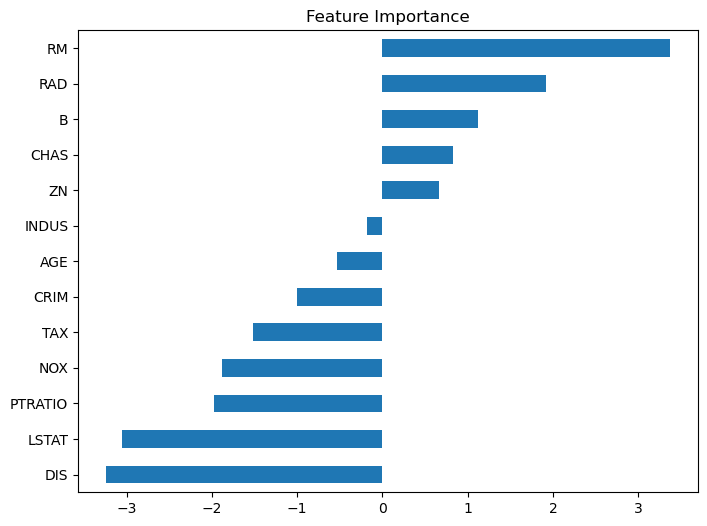

In [60]:
# Feature Importance
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance")
plt.show()

In [61]:

# Test on a New Sample
new_house = pd.DataFrame([{
    "CRIM": 0.02731,
    "ZN": 0.00,
    "INDUS": 7.07,
    "CHAS": 0,
    "NOX": 0.469,
    "RM": 6.421,
    "AGE": 78.9,
    "DIS": 4.9671,
    "RAD": 2,
    "TAX": 242,
    "PTRATIO": 17.8,
    "B": 396.90,
    "LSTAT": 9.14
}])

new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)

print(f"Predicted House Price: ${predicted_price[0]*1000:.2f}")


Predicted House Price: $24941.78


In [77]:

data = pd.read_csv("HousingData.csv")

data = data.fillna(data.mean())



In [78]:

# Feature & Target Split

X = data.drop("MEDV", axis=1)
y = data["MEDV"]

#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 
)



In [79]:

# Train Random Forest Model

model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)



RandomForestRegressor(n_estimators=300, random_state=42)

In [80]:

y_pred = model.predict(X_test)



In [81]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("RMSE:", rmse)
print("R² Score:", r2)



Model Performance:
RMSE: 2.9797856950913473
R² Score: 0.8789217955759979


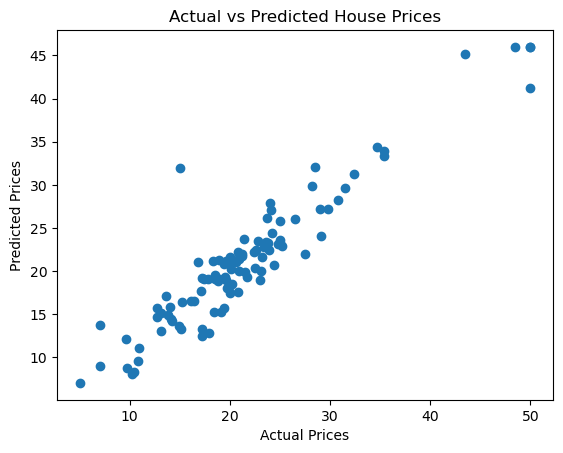

In [82]:

# Actual vs Predicted Plot
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

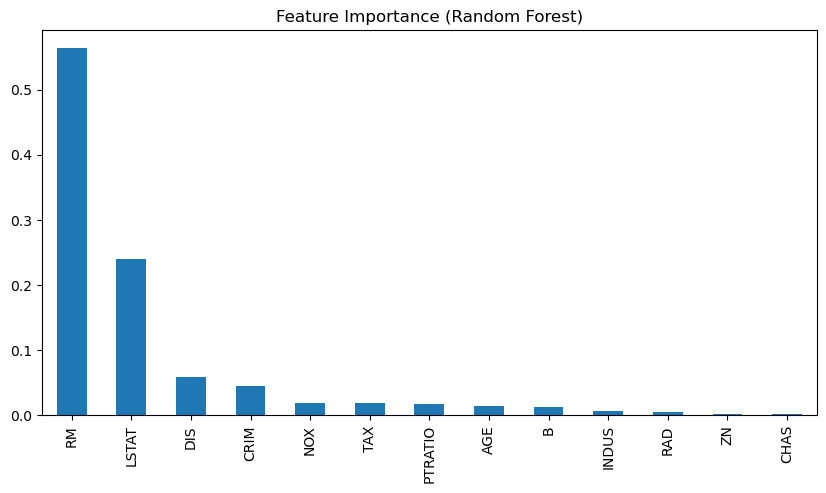

In [83]:


# Feature Importance

feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind="bar", figsize=(10,5))
plt.title("Feature Importance (Random Forest)")
plt.show()



In [84]:

# Test on a New data pts.

new_house = pd.DataFrame([{
    "CRIM": 0.02731,
    "ZN": 0.00,
    "INDUS": 7.07,
    "CHAS": 0,
    "NOX": 0.469,
    "RM": 6.421,
    "AGE": 78.9,
    "DIS": 4.9671,
    "RAD": 2,
    "TAX": 242,
    "PTRATIO": 17.8,
    "B": 396.90,
    "LSTAT": 9.14
}])

predicted_price = model.predict(new_house)

print(f"\nPredicted House Price: ${predicted_price[0]*1000:.2f}")


Predicted House Price: $21838.33
